<a href="https://colab.research.google.com/github/MHsafari/Classify_Images_Using_Python/blob/main/Copy_of_Classify_Images_Using_Python_9_adam_epoch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This program classify images


In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# Load the data
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [42]:
 #Test the model with an example
from google.colab import files
uploded=files.upload()

Saving ac.jpg to ac.jpg


In [43]:
new_image=plt.imread('ac.jpg')

In [6]:
#look at the data types of variables
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [7]:
# Get the shape of the arrays
print('x_train shape: ',x_train.shape)
print('y_train shape: ',y_train.shape)
print('x_test shape: ',x_test.shape)
print('y_test shape: ',y_test.shape)

x_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)
x_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000, 1)


In [8]:
# Take a look at the first images as an array
index=0
x_train[index]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

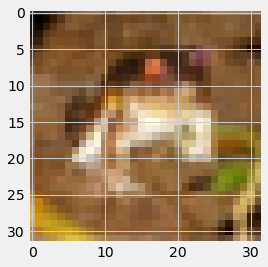

In [9]:
#show the image as a picture
img=plt.imshow(x_train[index])

In [10]:
# get the image label
print('The image label is: ',y_train[index])

The image label is:  [6]


In [11]:
#get the image classification
classification=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
#print the image class
print('The image class is: ',classification[y_train[index][0]])

The image class is:  frog


In [12]:
#Convert the labels into a 10 numbers to input into the neural network
y_train_one_hot=to_categorical(y_train)
y_test_one_hot=to_categorical(y_test)

In [13]:
#print the new labels
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [14]:
#Print the new label of the image above
print('The one hot label is: ',y_train_one_hot[index])

The one hot label is:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [15]:
#Normilize the pixels to be values between 0 and 1
x_train=x_train/255
x_test=x_test/255

In [16]:
x_train[index]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [17]:
#Create the models architecture
model=Sequential()
# Add the first layer
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)))

# Add a pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Add another convolution layer
model.add(Conv2D(32,(5,5),activation='relu'))

# Add another pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Add a flattening layer
model.add(Flatten())

# Add a layer with 1000 neurons
model.add(Dense(1000, activation='relu'))

# Add a drop out layer
model.add(Dropout(0.5))

# Add a layer with 500 neurons
model.add(Dense(500, activation='relu'))

# Add a drop out layer
model.add(Dropout(0.5))

# Add a layer with 250 neurons
model.add(Dense(250, activation='relu'))

# Add a layer with 10 neurons
model.add(Dense(10, activation='softmax'))

In [18]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],
              )

In [19]:
# Train the model
hist=model.fit(x_train,y_train_one_hot,
               batch_size=256,
               epochs=9,
               validation_split=0.2,

              
               )

Epoch 1/9
157/157 [==============================] - 58s 371ms/step - loss: 1.8456 - accuracy: 0.3094 - val_loss: 1.5270 - val_accuracy: 0.4325
Epoch 2/9
157/157 [==============================] - 58s 368ms/step - loss: 1.4738 - accuracy: 0.4616 - val_loss: 1.3665 - val_accuracy: 0.5102
Epoch 3/9
157/157 [==============================] - 58s 368ms/step - loss: 1.3421 - accuracy: 0.5138 - val_loss: 1.2752 - val_accuracy: 0.5404
Epoch 4/9
157/157 [==============================] - 58s 367ms/step - loss: 1.2303 - accuracy: 0.5585 - val_loss: 1.1819 - val_accuracy: 0.5803
Epoch 5/9
157/157 [==============================] - 58s 367ms/step - loss: 1.1468 - accuracy: 0.5893 - val_loss: 1.1063 - val_accuracy: 0.6104
Epoch 6/9
157/157 [==============================] - 58s 367ms/step - loss: 1.0723 - accuracy: 0.6180 - val_loss: 1.0615 - val_accuracy: 0.6222
Epoch 7/9
157/157 [==============================] - 58s 369ms/step - loss: 1.0174 - accuracy: 0.6377 - val_loss: 1.0314 - val_accuracy:

In [20]:
# Evaluate the model using the test dataset
model.evaluate(x_test,y_test_one_hot)[1]

313/313 [==============================] - 5s 15ms/step - loss: 0.9805 - accuracy: 0.6593


0.6593000292778015

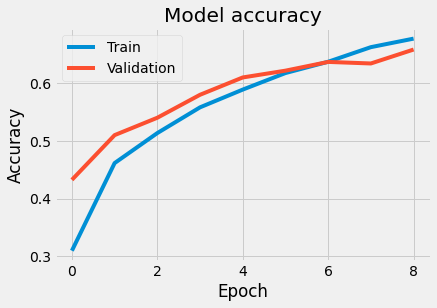

In [21]:
#Visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

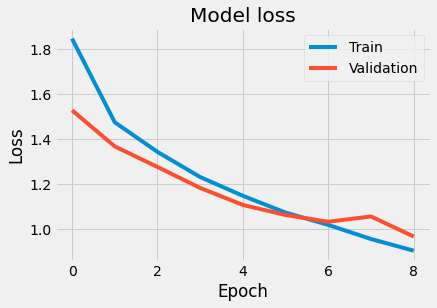

In [22]:
#Visualize the model loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()

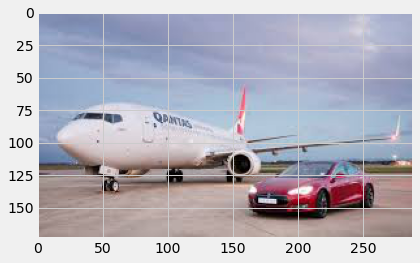

In [44]:
# Show the image

img=plt.imshow(new_image)

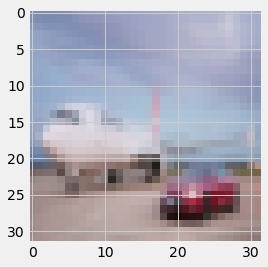

In [45]:
# Resize the image
from skimage.transform import resize
resized_image=resize(new_image,(32,32,3))
img=plt.imshow(resized_image)

In [46]:
# Get the model prediction
predictions=model.predict(np.array([resized_image])) #
# Show the predictions
predictions

array([[6.5943074e-01, 2.3746962e-02, 2.3619514e-03, 3.5632018e-04,
        5.3600958e-03, 6.5252549e-05, 4.1442667e-04, 2.6784101e-04,
        2.2533326e-01, 8.2663141e-02]], dtype=float32)

In [47]:
# Sort thepredictions from least to greatest
list_index=[0,1,2,3,4,5,6,7,8,9]
x=predictions
for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp=list_index[i]
      list_index[i]=list_index[j]
      list_index[j]=temp
# Show the sorted labels in order
print(list_index)


[0, 8, 9, 1, 4, 2, 6, 3, 7, 5]


In [48]:
# Print the first 5 predictions
for i in range(5):
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]]*100,2), '%')

airplane : 65.94 %
ship : 22.53 %
truck : 8.27 %
automobile : 2.37 %
deer : 0.54 %
